In [4]:
import numpy as np
import matplotlib.pyplot as plt

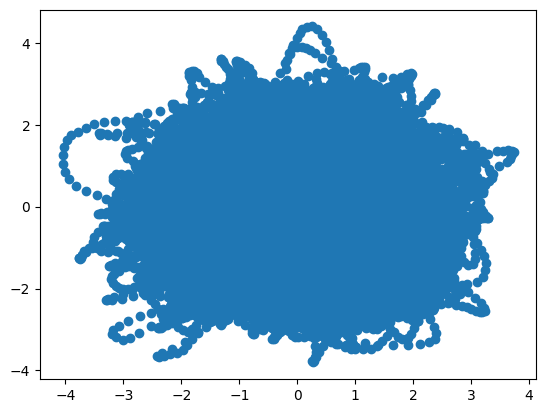

In [5]:
M, M_inv, mu_inv, N_d, kBT, sigma, sigma_a = np.eye(2), np.eye(2), 1., 2., 1., 1., 1.

def G(p):
  return mu_inv * (p.T @ M_inv @ p - N_d * kBT)

def A_step(q,p,xi,h):
  q = q + h * M_inv @ p
  return q,p,xi

def B_step(q,p,xi,h,force):
  p = p + h * (force(q) + sigma * np.sqrt(M) @ np.random.randn(p.shape[0]))
  return q,p,xi

def O_step(q,p,xi,h):
  term1 = np.exp(-xi*h) * p
  term2 = sigma_a * np.sqrt((1 - np.exp(-2 * xi * h)) / (2 * xi)) * np.random.randn(p.shape[0])
  p = term1 + term2
  return q,p,xi

def D_step(q,p,xi,h):
  xi = xi + h * G(p)
  return q,p,xi

def ld_BADODAB(q,p,xi,h,force):

    q, p, xi = np.copy(q), np.copy(p), np.copy(xi)
    q, p, xi = B_step(q,p,xi,h/2,force)
    q, p, xi = A_step(q,p,xi,h/2)
    q, p, xi = D_step(q,p,xi,h/2)
    q, p, xi = O_step(q,p,xi,h)
    q, p, xi = D_step(q,p,xi,h/2)
    q, p, xi = A_step(q,p,xi,h/2)
    q, p, xi = B_step(q,p,xi,h/2,force)

    return q, p, xi

def run_simulation(q0, p0, xi0, Nsteps, h, step_function, force):

    q_traj = [q0]
    p_traj = [p0]
    xi_traj = [xi0]

    q = q0
    p = p0
    xi = xi0

    for n in range(Nsteps):
        q,p,xi = step_function(q, p, xi, h, force)

        q_traj += [q]
        p_traj += [p]
        xi_traj += [xi]

    return q_traj, p_traj, xi_traj

def force(q):
  # U(q) = q^2 /2
  F = -q #+ np.random.randn(q.shape[0])
  return F

q_traj, p_traj, xi_traj = run_simulation(np.random.randn(2), np.random.randn(2), 0., 100000, 0.1, ld_BADODAB, force)

q_traj = np.array(q_traj)
plt.scatter(q_traj[:,0], q_traj[:,1])

Text(0.5, 1.0, 'BADODAB')

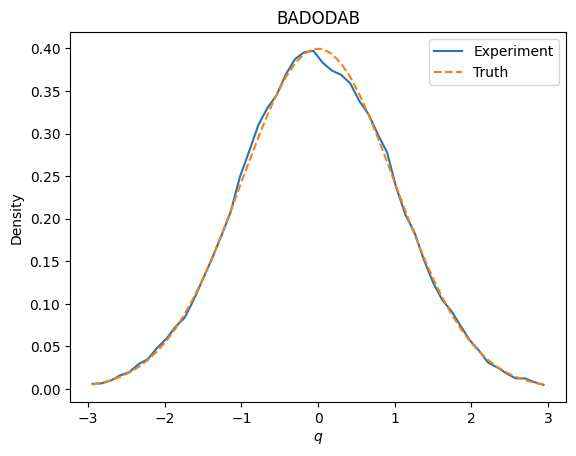

In [6]:
histogram,bins = np.histogram(q_traj,bins=50,range=[-3,3], density=True)
midx = (bins[0:-1]+bins[1:])/2
rho = np.exp(-(midx**2)/2)
rho = rho / (np.sum(rho) * (midx[1]-midx[0]))
plt.plot(midx,histogram,label='Experiment')
plt.plot(midx,rho,'--',label='Truth')
plt.xlabel('$q$')
plt.ylabel('Density')
plt.legend()
plt.title('BADODAB')

Text(0.5, 1.0, 'James Code')

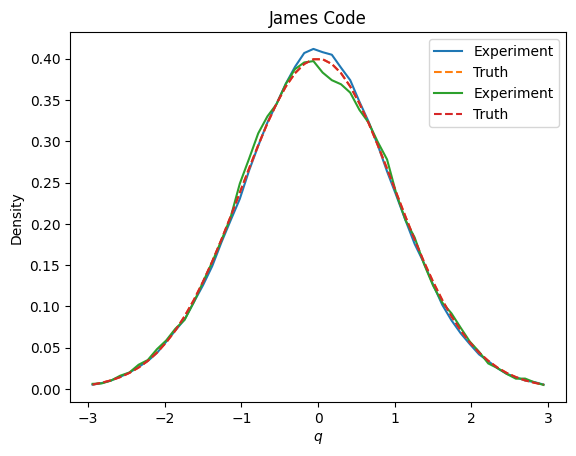

In [7]:
import numpy as np

def run_simulation(q0, p0, xi0, n_samples, h, force, sigma, sigma_A, mu, Nd, kbT):
  dim = q0.shape[0]
  q, p, xi = np.zeros((n_samples, dim)), np.zeros((n_samples, dim)), np.zeros(n_samples)
  q[0] = q0
  p[0] = p0
  xi[0] = xi0
  for i in range(0,n_samples-1):
    p[i+1] = p[i] + h * (force(q[i]) + sigma * np.random.randn(dim)) - h * xi[i] * p[i] + np.sqrt(h) * sigma_A * np.random.randn(dim)
    q[i+1] = q[i] + h * p[i+1]
    xi[i+1] = xi[i] + h/mu * (p[i+1].T @ p[i+1] - Nd * kbT)
  return (p, q)

def force(q):
  # U(q) = q^2 /2
  F = -q + np.random.randn(1)
  return F

q0, p0, xi0 = np.array([0.]), np.array([0.]), 0.
n_samples = 1000000
h = 0.1
sigma = 1.
sigma_A = 1.
mu = 1.
Nd = 1
kbT = 1.
p,q = run_simulation(q0, p0, xi0, n_samples, h, force, sigma, sigma_A, mu, Nd, kbT)

histogram,bins = np.histogram(q,bins=50,range=[-3,3], density=True)
midx = (bins[0:-1]+bins[1:])/2
rho = np.exp(-(midx**2)/2)
rho = rho / (np.sum(rho) * (midx[1]-midx[0])) # Normalize rho by dividing by its approx. integral
plt.plot(midx,histogram,label='Experiment')
plt.plot(midx,rho,'--',label='Truth')
plt.xlabel('$q$')
plt.ylabel('Density')
plt.title('My Code')

histogram,bins = np.histogram(q_traj,bins=50,range=[-3,3], density=True)
midx = (bins[0:-1]+bins[1:])/2
rho = np.exp(-(midx**2)/2)
rho = rho / ( np.sum(rho) * (midx[1]-midx[0]) ) # Normalize rho by dividing by its approx. integral
plt.plot(midx,histogram,label='Experiment')
plt.plot(midx,rho,'--',label='Truth')
plt.xlabel('$q$')
plt.ylabel('Density')
plt.legend()
plt.title('James Code')